In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Ciencia de Dados/Aprendizado de maquina/marketing.csv", delimiter='\t')

In [ ]:
data.drop('ID',axis='columns', inplace=True)

In [ ]:
#Spending variable creation
data['Age']=2014-data['Year_Birth']

data['Spending']= data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#Seniority variable creation
last_date = datetime.date(2014,10, 4)
data['Seniority'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced': 0,'Single': 0,'Married': 1,'Together': 1,'Absurd':0,'Widow': 0,'YOLO': 0, 'Alone': 0}) # 0 alone, 1 in-couple
data['Education']=data['Education'].replace({'Basic': 0,'2n Cycle': 0,'Graduation':1,'Master': 1,'PhD': 1})

data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 1, 0)
#data['Children'].replace({3: "3",2:'2',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


data=data[['Age','Education','Marital_Status','Income','Spending','Seniority','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,57,1,0,58138.0,1617,25.333333,0,0,635,88,546,172,88,88
1,60,1,0,46344.0,27,7.000000,1,2,11,1,6,2,1,6
2,49,1,1,71613.0,776,13.633333,0,0,426,49,127,111,21,42
3,30,1,1,26646.0,53,7.866667,1,1,11,4,20,10,3,5
4,33,1,1,58293.0,422,8.600000,1,1,173,43,118,46,27,15


In [ ]:
data.dropna(axis=0, how='any', thresh=None, subset=['Income'], inplace=True)
#OUTLIERS
data=data[data['Income']<600000]

In [ ]:
scaler=StandardScaler()
dataset_temp=data[['Income','Seniority','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Seniority','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             584           641             528    462
       mean            34757         37705           69542  73438
       std             12075         12397           12006  13753
       min              2447          1730           44802  49090
       25%             26489         28839           60880  65298

In [ ]:
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold,Cluster
0,57,1,0,58138,1617,25,0,0,635,88,546,172,88,88,Need attention
1,60,1,0,46344,27,7,1,2,11,1,6,2,1,6,Leaky bucket
2,49,1,1,71613,776,14,0,0,426,49,127,111,21,42,Stars
3,30,1,1,26646,53,8,1,1,11,4,20,10,3,5,Leaky bucket
4,33,1,1,58293,422,9,1,1,173,43,118,46,27,15,Leaky bucket


In [ ]:
features = data.columns

In [ ]:
data.rename(columns={'Cluster': 'target'}, inplace=True)

In [ ]:
df_target = data[['target']]
le = preprocessing.LabelEncoder()
df_data = df_target.apply(le.fit_transform)
df_data.tail()

,target
2235,2
2236,3
2237,3
2238,3
2239,0


In [ ]:
df = data.drop('target',1)
df.corr()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
Age,1,0,-0,0,0,-0,-0,0,0,0,0,0,0,0
Education,0,1,-0,0,0,-0,0,0,0,0,0,-0,-0,0
Marital_Status,-0,-0,1,-0,-0,-0,0,0,-0,-0,-0,-0,-0,-0
Income,0,0,-0,1,1,-0,-0,-0,1,1,1,1,1,0
Spending,0,0,-0,1,1,0,-1,-1,1,1,1,1,1,1
Seniority,-0,-0,-0,-0,0,1,0,-0,0,0,0,0,0,0
Has_child,-0,0,0,-0,-1,0,1,1,-0,-0,-1,-0,-0,-0
Children,0,0,0,-0,-1,-0,1,1,-0,-0,-1,-0,-0,-0
Wines,0,0,-0,1,1,0,-0,-0,1,0,1,0,0,0
Fruits,0,0,-0,1,1,0,-0,-0,0,1,1,1,1,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,df_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=10, random_state=1)

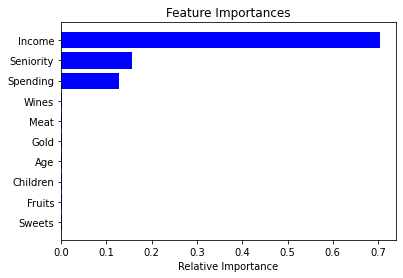

In [ ]:
features = df.columns
importances = model.feature_importances_
#indexes from the top 10 importances fetures
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

PCA

In [ ]:
##Data visualization using PCA
#Standardizing the data since PCA's output is influenced based on the scale of the features of the data
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
x.shape

(2215, 14)

In [ ]:
np.mean(x),np.std(x)

(-1.9705474129431996e-17, 0.9999999999999999)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
#convert to a Dataframe
normalized = pd.DataFrame(x,columns=feat_cols)
normalized.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
2210,0,0,1,0,1,0,1,0,1,0,0,0,2,4
2211,2,0,1,1,-0,-2,1,3,0,-1,-1,-1,-1,-1
2212,-1,0,-1,0,1,-1,-2,-1,2,1,0,-0,-0,-0
2213,1,0,1,1,0,-1,1,0,0,0,0,1,0,0
2214,1,0,1,0,-1,1,1,1,-1,-1,-0,-1,-1,-0


In [ ]:
from sklearn.decomposition import PCA
#Create 2 PC components
pca_data = PCA(n_components=2)
principalComponents = pca_data.fit_transform(x)

In [ ]:
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_df.tail()

,principal component 1,principal component 2
2210,3,-1
2211,-2,-3
2212,2,1
2213,1,-1
2214,-2,-2


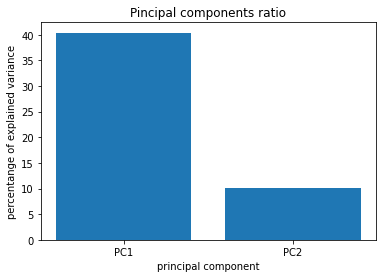

In [ ]:
import matplotlib.pyplot as plt
per_var = np.round(pca_data.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('Pincipal components ratio')
plt.show()

A partir do gráfico acima, é possível observar que o componente principal 1 detém aproximadamente 40% das informações, enquanto o componente principal 2 detém aproximademente 10% das informações.

Concluindo que os campos Income, Seniority, Spending são os mais relevantes.
Devido meu dataset não possuir dados binários ( 1 ou 0) que interferissem no resultado final não foi possível gerar o 2° gráfico de análise de componente principal.